In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/CarPrice_Assignment.csv")
df = df.drop(["CarName", "car_ID", "symboling","fuelsystem","fueltype","aspiration"], axis=1)
df.head(5)

,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### First we will check if we have nans in our data set and if so we will remove them or fill them

In [2]:
df.isna().sum()

doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

So we do not have any nans in our dataset and we can proceed with visualization for better analyzation


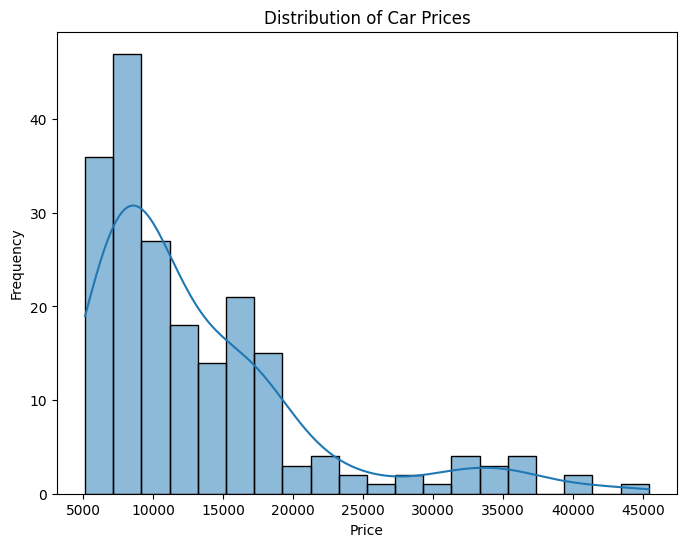

In [3]:
plt.figure(figsize=(8,6))
sns.histplot(df["price"], bins=20 , kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [4]:
df.nunique()

doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64




1.   From this we can identify the features with low unique values and we can remove those , as they might not improve our prediction model.
2.   This information can be used in encoding categrical variable as we will decide either we want to do One Hot Encoding  or ordinal encoding




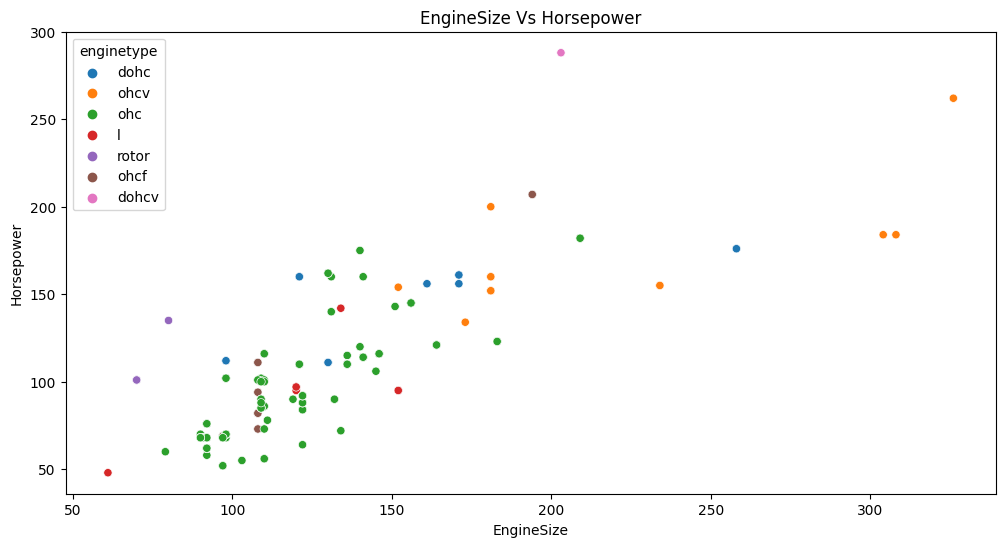

In [5]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df , x="enginesize" , y="horsepower", hue="enginetype")
plt.title("EngineSize Vs Horsepower")
plt.xlabel("EngineSize")
plt.ylabel("Horsepower")
plt.show()


The scatter plot between EngineSize and Horsepower is really helpful in following way first it shows which engine is most used . 2nd It also tell what type of engines can produce more power as it can be used in their luxury segment cars consedering their weight they need more power .

# Visualising Coorelation with variables

<ipython-input-6-466ce093dded>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


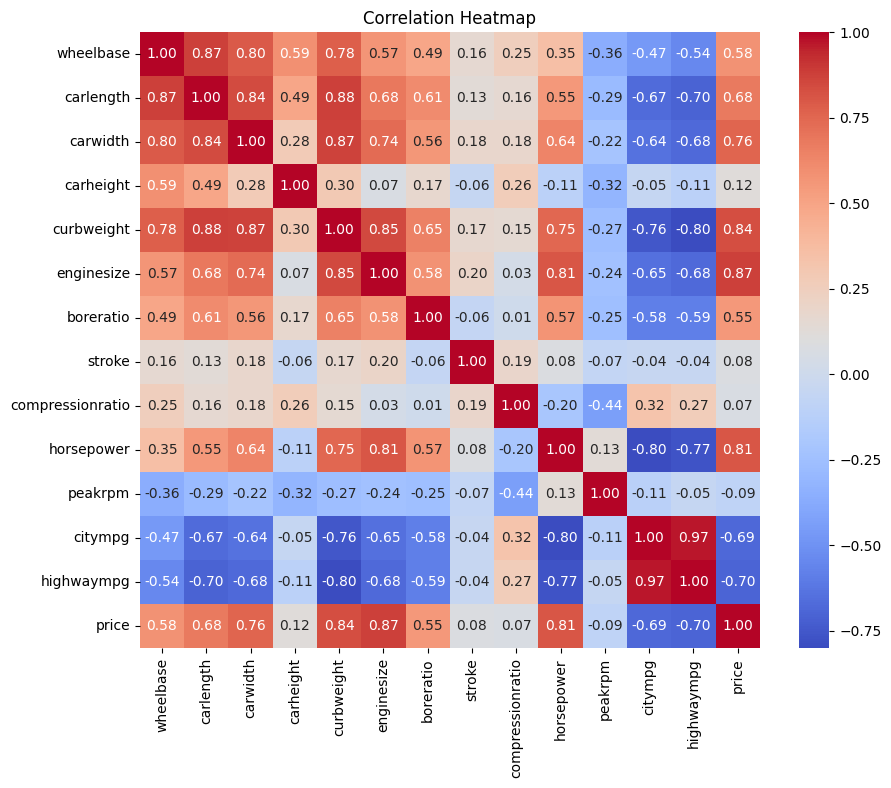

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### For a better heatmap visualization we will aplly threshhold and masking to the heatmap so we can analyze the information easily and effectively

<ipython-input-7-77d59675f127>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


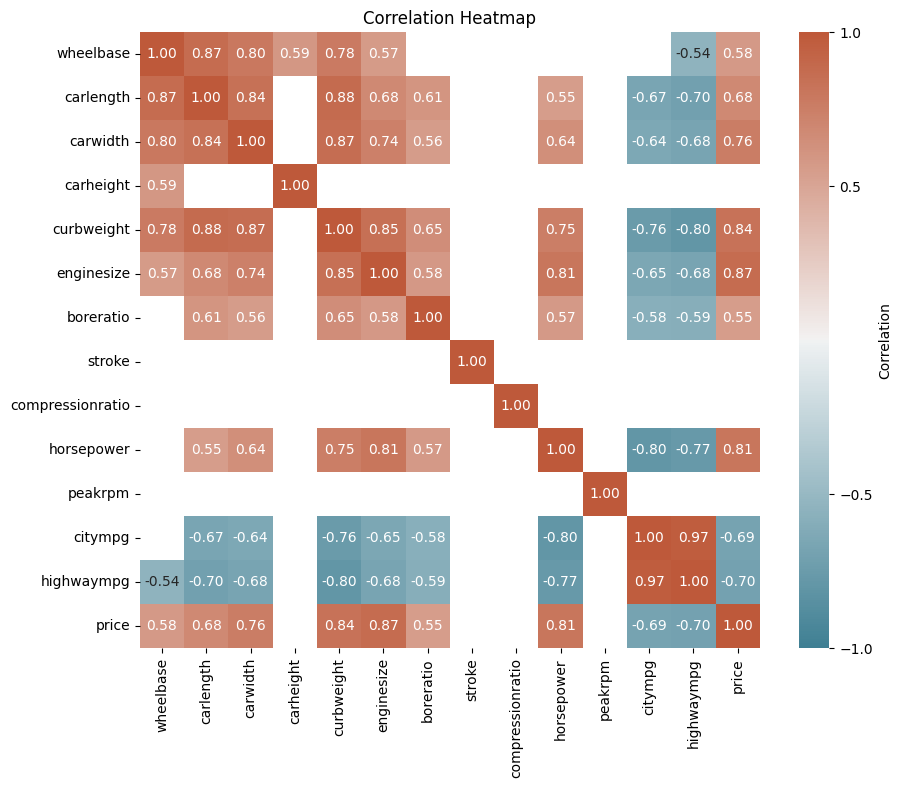

In [7]:
# Custom color pallete
cmap=sns.diverging_palette(220,22 , as_cmap=True)
threshold=0.5
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f" ,cbar_kws={"ticks":[-1,-0.5,0.5,1] , "label":"Correlation"},mask=correlation_matrix.abs()<threshold, vmin=-1 , vmax=1)
plt.title('Correlation Heatmap')
plt.show()


The heatmap you shows the correlation between a number of car features, including wheelbase, car length, car width, car height, curb weight, engine size, bore ratio, stroke, compression ratio, horsepower, peak RPM, city MPG, highway MPG, and price.

The heatmap shows that some car features are more strongly correlated with each other than others. For example, wheelbase, car length, and car width are all highly correlated with each other, meaning that cars with longer wheelbases and car lengths also tend to be wider. Curb weight is also highly correlated with wheelbase, car length, and car width, as well as engine size. This makes sense, as larger cars tend to be heavier.

Engine size is also highly correlated with horsepower and peak RPM. This is because larger engines generally produce more horsepower and can rev higher. However, engine size is negatively correlated with city MPG and highway MPG, as larger engines tend to be less fuel-efficient.

Price is positively correlated with all of the other car features, meaning that more expensive cars tend to have longer wheelbases, car lengths, car widths, car heights, curb weights, engine sizes, horsepower, and peak RPM. However, price is negatively correlated with city MPG and highway MPG, meaning that more expensive cars tend to be less fuel-efficient.

# Data Preprocessing

### Assigning the columns to x and y variables

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### One Hot Encoding

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer=[(["encoder", OneHotEncoder(), [0,1,2,3,9,10]])]
ct=ColumnTransformer(transformers=transformer , remainder="passthrough")
x=np.array(ct.fit_transform(x))
print(x)


[[0.0 1.0 1.0 ... 5000 21 27]
 [0.0 1.0 1.0 ... 5000 21 27]
 [0.0 1.0 0.0 ... 5000 19 26]
 ...
 [1.0 0.0 0.0 ... 5500 18 23]
 [1.0 0.0 0.0 ... 4800 26 27]
 [1.0 0.0 0.0 ... 5400 19 25]]


### Splitting the Data into test and train  

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x , y , test_size=0.3 , random_state=0)

### Dimensionalty Reduction

In [11]:
# Dimensionality reduction

from sklearn.decomposition import PCA
dm_red=PCA(n_components=4 , svd_solver="auto")
dm_red.fit_transform(x_train)
dm_red.transform(x_test)

array([[-4.30293123e+02, -5.33464254e+02,  1.32648252e+01,
         1.89407904e-01],
       [ 3.77873700e+02,  4.42765814e+02,  5.27934074e+00,
        -1.39451646e+01],
       [-3.05191780e+02,  2.41792685e+02,  7.81292952e+00,
         8.71055509e+00],
       [-8.11199659e+02, -7.34843022e+02,  1.36756943e+01,
        -1.18416054e-01],
       [-4.62076431e+02,  1.04032671e+02,  2.46747400e-01,
        -7.99269193e-01],
       [ 2.85954335e+02, -1.70460596e+02,  1.94994412e+01,
        -2.95436623e+00],
       [-7.50348179e+02, -1.49504869e+02,  1.02961637e+00,
         1.25143008e+01],
       [-9.77541175e+00, -4.31452935e+02, -2.08496311e+01,
        -1.74793616e+00],
       [ 3.18663454e+02,  3.91258740e+02,  3.14052841e+01,
        -4.16946213e+00],
       [-1.06347879e+03,  2.40971287e+02, -6.03060353e+00,
         1.54276898e+01],
       [ 6.73027818e+02, -5.61978730e+02,  4.55028003e+01,
        -5.88147647e+00],
       [ 1.81525345e+02,  1.00684315e+03,  9.53990371e+01,
      

# Training the Model

### Parameter Selection Using Randomized Search Cv

In [12]:
from numpy.core.function_base import linspace
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

reg=RandomForestRegressor()
rsc=RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100 , stop=1200 , num=9)]
max_features=["auto","sqrt","log2",None]
max_depth=[int(x) for x in np.linspace(10,1500,9)]
min_samples_split=[2,3,5,7,9,12,15,19]
min_samples_leaf=[1,2,3,4,5,6,7,8,9,10,12,13,15]
criterion=["squared_error"]

grid={"n_estimators":n_estimators,
      "max_features":max_features,
      "min_samples_split":min_samples_split,
      "min_samples_leaf":min_samples_leaf,
      "max_depth":max_depth,
      "criterion":criterion}

rcv=RandomizedSearchCV(estimator=reg,param_distributions=grid, n_iter=250, n_jobs=-1 , verbose=2 , random_state=42,cv=7)
rcv.fit(x_train,y_train)

Fitting 7 folds for each of 250 candidates, totalling 1750 fits


RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=250,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [10, 196, 382, 568, 755,
                                                      941, 1127, 1313, 1500],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 12,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 5, 7, 9, 12,
                                                              15, 19],
                                        'n_estimators': [100, 237, 375, 512,
                                                         650, 787, 925, 1062,
                                                         1200]},
                   random_state=42, verbose=2)

### Printing the best parameters we got from Randomized Search Cv so we can then we can fit them in Grid Search Cv for a more acuurate results

In [13]:
rcv.best_params_

{'n_estimators': 925,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 568,
 'criterion': 'squared_error'}

### Fitting and adjusting the best parameters in Grid Search Cv

In [14]:
grc = {
    'n_estimators': [rcv.best_params_["n_estimators"], rcv.best_params_["n_estimators"]-90, rcv.best_params_["n_estimators"]-50, rcv.best_params_["n_estimators"]+150, rcv.best_params_["n_estimators"]-40],
    'min_samples_split': [rcv.best_params_["min_samples_split"], rcv.best_params_["min_samples_split"]+3, rcv.best_params_["min_samples_split"]-3, rcv.best_params_["min_samples_split"]+1, rcv.best_params_["min_samples_split"]-1],
    'min_samples_leaf': [rcv.best_params_["min_samples_leaf"]+2, rcv.best_params_["min_samples_leaf"]],
    'max_features': [rcv.best_params_["max_features"]],
    'max_depth': [rcv.best_params_["max_depth"]],
    'criterion': [rcv.best_params_["criterion"]]
}


In [15]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=reg, param_grid=grc, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)


Fitting 9 folds for each of 50 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=9, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'], 'max_depth': [568],
                         'max_features': ['sqrt'], 'min_samples_leaf': [3, 1],
                         'min_samples_split': [3, 6, 0, 4, 2],
                         'n_estimators': [925, 835, 875, 1075, 885]},
             verbose=2)

### Predicting The Model

In [16]:
y_pred = grid_search.predict(x_test)

### Checking Efficiency Of The Model

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)

rmse=np.sqrt(mse)
print("The Root mean squared error is ",rmse)

# Calculate R-squared (R2) for model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1485.1605728460136
Mean Squared Error (MSE): 6073802.970345155
The Root mean squared error is  2464.508667127214
R-squared (R2): 0.9080247604453564


### So our model's prediction is around 91%

### Difference between actual and predicted values

In [18]:
new_df=pd.DataFrame(data={"actual_values" : y_test , "predicted_values": y_pred})
new_df["difference"]= new_df["predicted_values"] - new_df["actual_values"]
print(new_df)


    actual_values  predicted_values   difference
0          6795.0       6038.554491  -756.445509
1         15750.0      17106.659083  1356.659083
2         15250.0      13855.044325 -1394.955675
3          5151.0       8123.557489  2972.557489
4          9995.0       9579.636926  -415.363074
..            ...               ...          ...
57        18420.0      18480.522760    60.522760
58         9960.0       9067.383034  -892.616966
59         6229.0       6312.773653    83.773653
60         6479.0       6306.712575  -172.287425
61        15510.0      13174.098204 -2335.901796

[62 rows x 3 columns]
